<a href="https://colab.research.google.com/github/valdolab/DS_mAIstros/blob/main/Week4/Assignment_4_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - ANN and Logic regression

## Import and pre-processing dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#load the dataset, churn modelling, I selected this
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EIT_W4/Churn_Modelling.csv")
#justo to view if has some missing values, and the distributions of the classes
print(data.iloc[:,-1].value_counts())
print(data.isnull().sum())
print((data=="?").sum())
print("Size: ", data.shape)

0    7963
1    2037
Name: Exited, dtype: int64
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Size:  (10000, 14)


In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

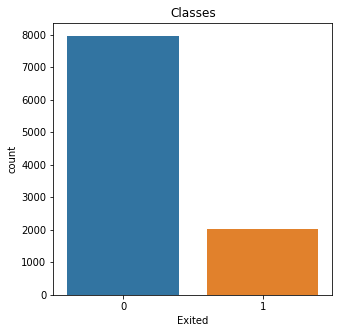

In [12]:
#plot the dataset distribution
plt.figure(figsize=(5, 5))
sns.countplot(x=data["Exited"])
plt.title('Classes')
plt.show()

In [13]:
#view data
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
#drop useless features and duplicates
data = data.drop_duplicates()

#remove ids (MLS) from each pattern
#due to that feature has a big entropy, doesn't have to much info about the pattern
#Thus, the lower the entropy of a feature, the more significant that feature will be.
data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [15]:
#show the result
print(data.shape)
data

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### convert cat to num in order to make the classification

In [16]:
print(data['Geography'].unique())
print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [17]:
# replacing values
data['Geography'].replace(['France', 'Spain', 'Germany'],
                        [0, 1, 2], inplace=True)
data['Gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)

In [18]:
print(data.shape)
print(data.dtypes)
data

(10000, 11)
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


<Axes: >

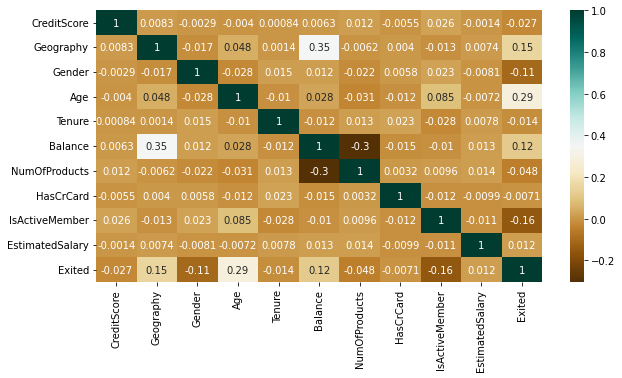

In [20]:
#plot the correlation info
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

### Resampling (Oversampling and Undersampling)

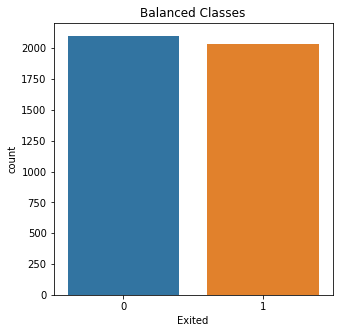

In [21]:
#Undersampling, remove some random examples in order to have a balanced dataset
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
class_1 = shuffled_df.loc[shuffled_df['Exited'] == 1]

#Randomly select 5000 observations from the non-exited (majority class)
class_0 = shuffled_df.loc[shuffled_df['Exited'] == 0].sample(n=2100,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([class_1, class_0])

#plot the dataset after the undersampling
plt.figure(figsize=(5, 5))
sns.countplot(x=normalized_df['Exited'])
plt.title('Balanced Classes')
plt.show()

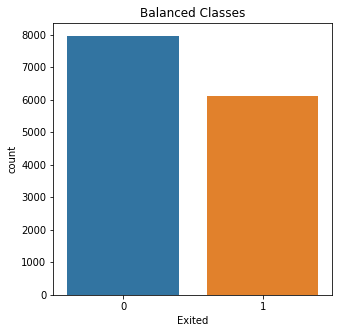

In [118]:
#now oversampling
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
#Randomly select 5000 observations from the 1-exited class (minority class)
class_0_temp = shuffled_df.loc[shuffled_df['Exited'] == 1].copy()
class_0 = pd.concat([class_0_temp, shuffled_df.loc[shuffled_df['Exited'] == 1]])
class_0_temp = class_0.sample(n=2037,random_state=42)
class_0 = pd.concat([class_0_temp, class_0])

class_1 = shuffled_df.loc[shuffled_df['Exited'] == 0]

# Concatenate both dataframes again
normalized_df = pd.concat([class_0, class_1])

#plot the dataset after the undersampling
plt.figure(figsize=(5, 5))
sns.countplot(x=normalized_df['Exited'])
plt.title('Balanced Classes')
plt.show()

In [119]:
print(normalized_df.shape)
print(normalized_df.iloc[:,-1].value_counts())

(14074, 11)
0    7963
1    6111
Name: Exited, dtype: int64


<Axes: >

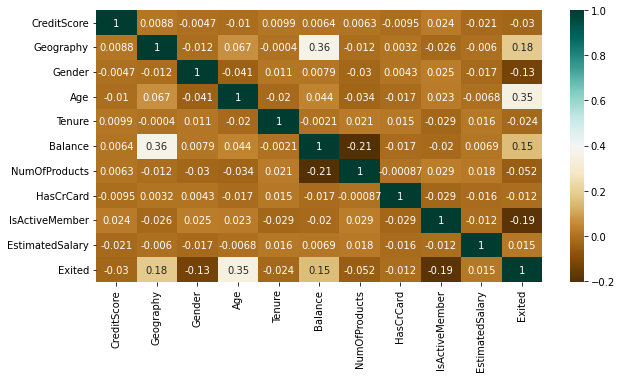

In [120]:
plt.figure(figsize=(10,5))
c = normalized_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

### Standarization the dataset

In [121]:
#data_n = data.copy()
data_n = normalized_df.copy()

#normalize and standarization data
mean_data = []
std_data = []
for column in data_n.iloc[:,:-1]:
    #normalization
    #data_n[column] = data[column]  / data[column].abs().max()
    #data_n[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
    #standarization
    mean_data.append(data[column].mean())
    std_data.append(data[column].std())
    data_n[column] = (data[column]-data[column].mean())/data[column].std()
data_n

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6518,-1.340138,0.301650,-1.095933,0.960945,-0.350186,0.103440,0.807696,-1.547691,-1.030619,-0.655137,1
518,0.491149,-0.902541,0.912374,0.865596,-0.350186,0.396689,0.807696,-1.547691,0.970194,1.351503,1
5212,0.946385,1.505841,0.912374,1.533037,-0.004426,1.261435,-0.911538,-1.547691,0.970194,0.367192,1
7316,1.474044,1.505841,0.912374,1.437689,-1.041708,0.841064,-0.911538,-1.547691,-1.030619,-1.416382,1
2115,-2.550651,1.505841,-1.095933,1.437689,-0.350186,0.784811,-0.911538,0.646059,-1.030619,-0.284723,1
...,...,...,...,...,...,...,...,...,...,...,...
456,0.853268,-0.902541,0.912374,-0.564637,-0.695947,-1.225786,-0.911538,0.646059,0.970194,-1.607072,0
6017,-1.691911,-0.902541,-1.095933,-0.469288,-1.041708,0.313052,-0.911538,-1.547691,-1.030619,-1.582411,0
709,0.366994,-0.902541,-1.095933,-0.469288,-0.695947,0.761019,0.807696,0.646059,-1.030619,0.829490,0
8366,-0.139972,-0.902541,0.912374,0.198154,-1.041708,-1.225786,0.807696,-1.547691,0.970194,0.042169,0


In [122]:
data_4f = data_n[['Geography','Gender','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']].copy()

### Preparing the dataset for use, and split for test and train

In [123]:
#X = data_n.to_numpy()
X = data_4f.to_numpy()
X

array([[ 0.30164992, -1.09593272,  0.96094451, ..., -1.03061858,
        -0.65513662,  1.        ],
       [-0.90254137,  0.91237353,  0.86559568, ...,  0.97019404,
         1.35150346,  1.        ],
       [ 1.50584121,  0.91237353,  1.53303744, ...,  0.97019404,
         0.36719247,  1.        ],
       ...,
       [-0.90254137, -1.09593272, -0.46928784, ..., -1.03061858,
         0.8294902 ,  0.        ],
       [-0.90254137,  0.91237353,  0.19815392, ...,  0.97019404,
         0.04216935,  0.        ],
       [ 1.50584121, -1.09593272, -0.85068313, ..., -1.03061858,
        -0.78791882,  0.        ]])

In [124]:
#first shufle the dataset
np.random.shuffle(X)
num_test = int(len(X)*0.10)

#and the split for training and test, and also the target feature
X_test = X[0:num_test,:-1]
y_test = X[0:num_test,-1].astype(int)
X_train = X[num_test:,:-1]
y_train = X[num_test:,-1].astype(int)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)
y_train

X_train:  (12667, 8)
y_train:  (12667,)
X_test:  (1407, 8)
y_test:  (1407,)


array([1, 0, 0, ..., 0, 0, 1])

## Implementation of classifiers

### Shalow ANN (MLP)

In [34]:
def linear(H):
  return H

#most activation functions used: relu, sigmoid, tanh
#which activiation functions need to multiclass problem?: ???
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1,keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i,y[i]] = 1
  return Y

def cross_entropy(y,P_hat):
  return -np.sum(y*np.log(P_hat))

In [35]:
class Shallow_ANN():
  def fit(self,X,y,neurons=10,eta=1e-3,epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(y)
    N,D = X.shape
    K = Y.shape[1]
    #weights and bias initialization
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
    self.B = {l: np.random.rand(M) for l,M in enumerate([neurons,K],1)}
    #define activation
    #for layer 1 activation is tanh, and for layer 2 activation is softmax
    self.a = {1:np.tanh, 2:softmax}

    J = np.zeros(epochs)
    #GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y,self.Z[2])
      
      #weights and biases update rules
      #for layer 2 (output)
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #For layer 1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if(show_curve):
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    self.Z={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self,X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

### Artificial Neural net with backpropagation

In [96]:
def linear(H):
  return H

def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1, keepdims=True)

#loss functions
def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
  return (1/(2*len(Y)))*np.sum((Y-Y_hat))

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]] = 1
  return Y

#metrics
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def R2(y,y_hat):
  return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)

In [97]:
def derivate(Z,a):
  
  if(a == linear):
    return 1
  elif(a == sigmoid):
    return Z*(1-Z)
  elif(a == np.tanh):
    return 1-Z*Z
  elif(a == ReLU):
    return (Z>0).astype(int)
  else:
    ValueError("Unknown Activation Function")

In [98]:
class ANN():
  
  def __init__(self,architecture, activations=None, mode=0):
    self.mode = mode
    self.architecture = architecture
    self.activations = activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    if(self.mode):
      Y = y
    else:
      Y = one_hot_encode(y)

    N,D = X.shape
    K = Y.shape[1]

    #inicializar los pesos
    self.W = {l: np.random.randn(M[0],M[1])for l, M in enumerate
              (zip(([D]+self.architecture),(self.architecture+[K])),1)}
    self.B = {l: np.random.randn(M) for l,M in enumerate(self.architecture+[K],1)}
    
    if self.architecture is None:
      self.a = {l:ReLU for l in range(1,self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations,1)}

    if self.mode:
      self.a[self.L] = linear
    else:
      #si es clasification binaria tiene que ser sigmoid la funcion de activcion de la ultima cada de neuronas
      self.a[self.L] = softmax
    
    J = np.zeros(epochs)

    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch] = OLS(Y,self.Z[self.L])
      else:
        J[epoch] = cross_entropy(Y, self.Z[self.L])
      
      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse=True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.B[l] -= eta*dB

        if l > 1:
          dZ = dH@self.W[l].T
          dH = dZ*derivate(self.Z[l-1],self.a[l-1])

    if(show_curve):
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    self.Z = {0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.B[l])  

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

## Classification using the dataset

### Using Shallow ANN

#### With balanced dataset

In [125]:
my_ann = Shallow_ANN()

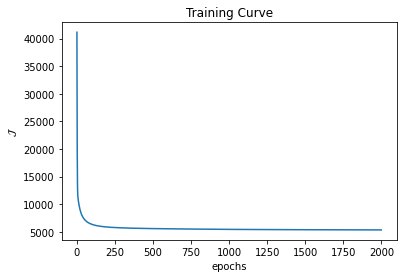

In [126]:
my_ann.fit(X_train,y_train, neurons=36, eta = 4e-1, epochs=2e3, show_curve=True)

In [129]:
y_hat2 = my_ann.predict(X_test)
accuracy(y_test,y_hat2)

0.8116560056858564

In [128]:
#other metrics
y_hat2 = my_ann.predict(X_test)
table_trues = pd.DataFrame([y_test,y_hat2]).T
table_trues_0 = table_trues.loc[table_trues.iloc[:,0] == 0]
table_trues_1 = table_trues.loc[table_trues.iloc[:,0] == 1]

c0 = table_trues_0.to_numpy()
c0_y_true = c0[:,0]
c0_y_hat = c0[:,1]
specificity = accuracy(c0_y_true,c0_y_hat)
c1 = table_trues_1.to_numpy()
c1_y_true = c1[:,0]
c1_y_hat = c1[:,1]
sensitivity = accuracy(c1_y_true,c1_y_hat)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Specificity:  0.8631713554987213
Sensitivity:  0.7472


#### With imbalanced dataset

In [108]:
my_ann = Shallow_ANN()

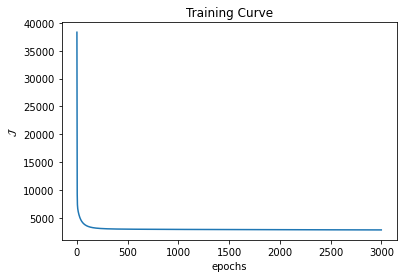

In [113]:
my_ann.fit(X_train,y_train, neurons=35, eta = 4e-1, epochs=3e3, show_curve=True)

In [114]:
y_hat3 = my_ann.predict(X_test)
accuracy(y_test,y_hat3)

0.847

In [115]:
#other metrics
table_trues = pd.DataFrame([y_test,y_hat3]).T
table_trues_0 = table_trues.loc[table_trues.iloc[:,0] == 0]
table_trues_1 = table_trues.loc[table_trues.iloc[:,0] == 1]

c0 = table_trues_0.to_numpy()
c0_y_true = c0[:,0]
c0_y_hat = c0[:,1]
specificity = accuracy(c0_y_true,c0_y_hat)
c1 = table_trues_1.to_numpy()
c1_y_true = c1[:,0]
c1_y_hat = c1[:,1]
sensitivity = accuracy(c1_y_true,c1_y_hat)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Specificity:  0.944792973651192
Sensitivity:  0.4630541871921182


### Neural net with back propagation

In [264]:
ann = ANN([20,10],[np.tanh,ReLU])

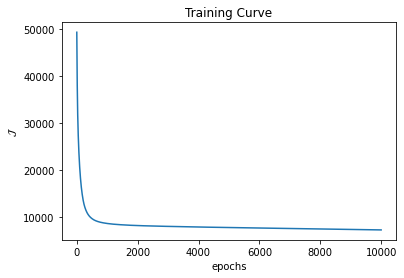

In [265]:
ann.fit(X_train,y_train,eta = 1e-1, epochs= 1e3,show_curve=True)

In [133]:
y_hat2 = ann.predict(X_test)
accuracy(y_test,y_hat2)

0.862

In [263]:
y_hat2 = ann.predict(X_test)
accuracy(y_test,y_hat2)

0.7527366387636832

In [254]:
from sklearn.metrics import f1_score
y_hat2 = ann.predict(X_test)
f1_score(y_test,y_hat2)

0.7473404255319149

In [255]:
from sklearn.metrics import precision_score
precision_score(y_test,y_hat2)

0.7424042272126816

In [256]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_hat2).ravel()
specificity = tn /(tn+fp)
sensitivity = tp/(tp+fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Specificity:  0.7580645161290323
Sensitivity:  0.7523427041499331


In [136]:
from sklearn.metrics import recall_score
recall_score(y_test,y_hat2)

0.4724770642201835

In [137]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_hat2)

0.7215326497571506

In [138]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_hat2).ravel()
specificity = tn /(tn+fp)
sensitivity = tp/(tp+fn)

In [139]:
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Specificity:  0.9705882352941176
Sensitivity:  0.4724770642201835
